In [1]:
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qiskit.tools.jupyter import *
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings

warnings.filterwarnings('ignore')

pi = np.pi
cos = np.cos
sin = np.sin
exp = np.exp
sqrt = np.sqrt

In [2]:
anharmonicity = 4581552617.648945 - 4.92517 * 1e9

In [3]:
def Z01(phi):
    return np.array([[exp(1j * phi), 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])


def Z12(phi):
    return np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, exp(1j * phi)]])


def X01(theta):
    return np.array([[np.cos(theta / 2), -1j * np.sin(theta / 2), 0],
                     [-1j * np.sin(theta / 2), np.cos(theta / 2), 0],
                     [0, 0, 1]])


def X12(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta / 2), -1j * np.sin(theta / 2)],
                     [0, -1j * np.sin(theta / 2), np.cos(theta / 2)]])

def Y01(theta):
    return np.array([[np.cos(theta/2), -np.sin(theta/2), 0],
                     [np.sin(theta/2), np.cos(theta/2), 0],
                     [0, 0, 1]])

def Y12(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta/2), -np.sin(theta/2)],
                     [0, np.sin(theta/2), np.cos(theta/2)]])

def model_zero_population(alpha, n):
    # alpha are parameters of the model
    psi_init = [[1], [0], [0]]
    psi_final = Y01(pi/2) @ psi_init
    for i in range(8*n):
        psi_final = Z01(alpha) @ X12(pi/2) @ psi_final
    psi_final = Y01(-pi/2) @ psi_final
    return np.absolute(psi_final[0][0]) ** 2



In [4]:
a = [[1, 2, 3], [4, 5, 6]]
b = [[7, 8, 9], [10, 11, 12]]
c = [a, b]
d = []
for i in c:
    for j in i:
        d.append(j)
d

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

In [5]:
num_series = 6
num_sample = 16
# files = ['ramsey_exp_data_630c345b65fbdd748201e059_1to6.csv', 'ramsey_exp_data_630c34ae19ada766f904bf0a_7to12.csv',
#          'ramsey_exp_data_630c34f6b3145c190b80958e_13to18.csv', 'ramsey_exp_data_630c351facf65c9ec1809254_19to24.csv',
#          'ramsey_exp_data_630c354c04b8d5ed019181c1_25to30.csv']

# files = ['ramsey_exp_data_630c7d27acf65c28fd80940f_1to6.csv', 'ramsey_exp_data_630c7d6fb3145c3979809746_7to12.csv',
#          'ramsey_exp_data_630c7ddb794b2e2e1b347f85_13to18.csv', 'ramsey_exp_data_630c7e41acf65cd49380941b_19to24.csv',
#          'ramsey_exp_data_630c7e71acf65c809e80941d_25to30.csv']

# files = ['ramsey_exp_data_630c9b481d4bf84119eddc70_1to6.csv', 'ramsey_exp_data_630c9b74794b2e32cd347ffa_7to12.csv',
#          'ramsey_exp_data_630c9b99b3145c8be78097d4_13to18.csv', 'ramsey_exp_data_630c9bc11d4bf88172eddc77_19to24.csv',
#          'ramsey_exp_data_630c9c091d4bf8ea3ceddc78_25to30.csv']


In [6]:
data = []
for file in files:
    for d in genfromtxt(file, delimiter=",")[3:, 0]:
        data.append(d)
np.shape(data)

(480,)

In [7]:
def get_position(i, j):
    n = i + num_sample*j
    return n

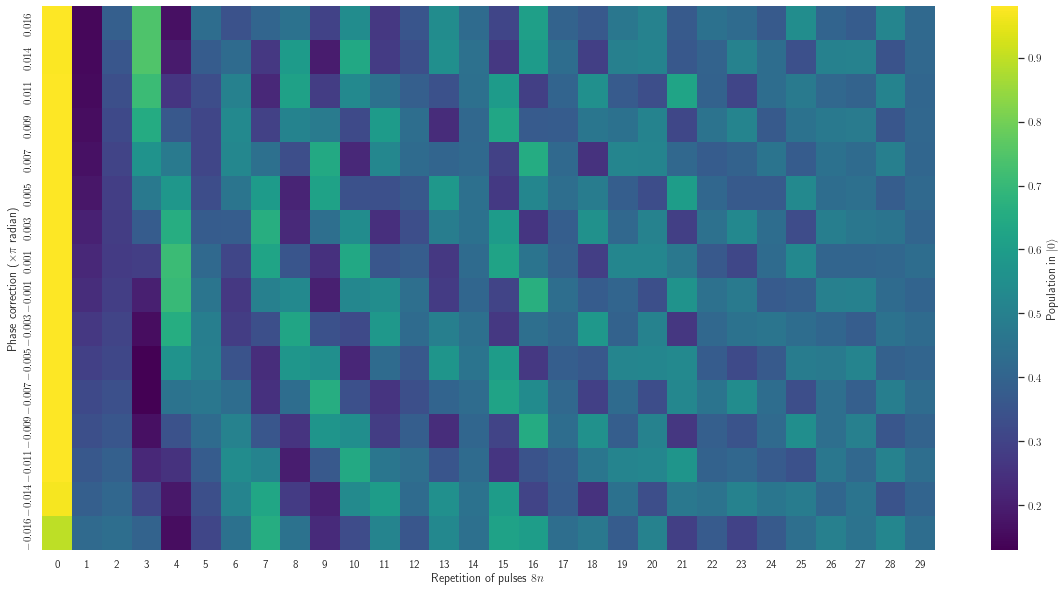

In [11]:
zero_population_exp = np.zeros([num_sample, 30])
for i in range(num_sample):
    for j in range(30):
        zero_population_exp[i, j] = data[get_position(i, j)]
sns.heatmap(np.flipud(zero_population_exp), cbar_kws={'label': 'Population in $|0 \\rangle$'}, cmap="viridis")

sns.set(rc={'figure.figsize':(10,20), 'text.usetex':'True'})
y_ticks_num = np.flip(np.linspace(-1/64, 1/64, num_sample))
y_ticks_label = ['$' + str(np.round(num, 3)) + '$' for num in y_ticks_num]
plt.yticks(plt.yticks()[0], y_ticks_label)
plt.xlabel('Repetition of pulses $8n$')
plt.ylabel('Phase correction ($\\times \pi$ radian)')
plt.show()

In [9]:
zero_population_exp

array([[0.89485, 0.42065, 0.43395, 0.39665, 0.1564 , 0.30805, 0.4463 ,
        0.6556 , 0.45025, 0.23055, 0.3245 , 0.51355, 0.3575 , 0.5253 ,
        0.44045, 0.62085, 0.60055, 0.4351 , 0.4697 , 0.37355, 0.5065 ,
        0.28845, 0.37075, 0.2985 , 0.36735, 0.4374 , 0.49845, 0.4541 ,
        0.52095, 0.42985],
       [0.96875, 0.38385, 0.4093 , 0.30735, 0.1841 , 0.3357 , 0.5141 ,
        0.6333 , 0.279  , 0.20705, 0.5333 , 0.5981 , 0.42465, 0.554  ,
        0.4493 , 0.59515, 0.3006 , 0.3746 , 0.2502 , 0.4487 , 0.32935,
        0.472  , 0.4527 , 0.5078 , 0.4628 , 0.4844 , 0.40665, 0.45755,
        0.34695, 0.3991 ],
       [0.97825, 0.35955, 0.3874 , 0.22355, 0.25105, 0.37275, 0.5411 ,
        0.5088 , 0.19665, 0.36385, 0.64445, 0.46475, 0.4373 , 0.35345,
        0.4232 , 0.26265, 0.349  , 0.38195, 0.46505, 0.51225, 0.51905,
        0.57355, 0.3928 , 0.40945, 0.371  , 0.3407 , 0.4672 , 0.41375,
        0.502  , 0.43265],
       [0.97925, 0.33295, 0.35805, 0.1658 , 0.34365, 0.4241 , 0.502